### Exercício - 001
Faça o _download_ dos dados listados acima, leia os dados com a biblioteca _pandas_ e remova as colunas 'CustomerID' e 'Gender'.

In [1]:
import pandas as pd
import os

# Definir o diretório de destino
data_dir = '../data'
os.makedirs(data_dir, exist_ok=True)

# Baixar os dados
!wget -O {data_dir}/Mall_Customers.csv https://raw.githubusercontent.com/MFuchs1989/Datasets-and-Miscellaneous/main/datasets/Mall_Customers.csv

--2024-10-28 14:23:48--  https://raw.githubusercontent.com/MFuchs1989/Datasets-and-Miscellaneous/main/datasets/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3780 (3,7K) [text/plain]
Saving to: ‘../data/Mall_Customers.csv’

../data/Mall_Custom 100%[===================>]   3,69K  --.-KB/s    in 0s      

2024-10-28 14:23:49 (34,0 MB/s) - ‘../data/Mall_Customers.csv’ saved [3780/3780]



In [5]:
# Ler os dados com pandas
file_path = os.path.join(data_dir, 'Mall_Customers.csv')
df = pd.read_csv(file_path)
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
# Remover as colunas 'CustomerID' e 'Gender'
df.drop(columns=['CustomerID', 'Gender'], inplace=True)

# Exibir as primeiras linhas do DataFrame
print(df.head())

   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40


### Exercício - 002
Utilize o método _dendrogram_ do módulo `scipy.cluster.hierarchy` para criar um dendrograma.

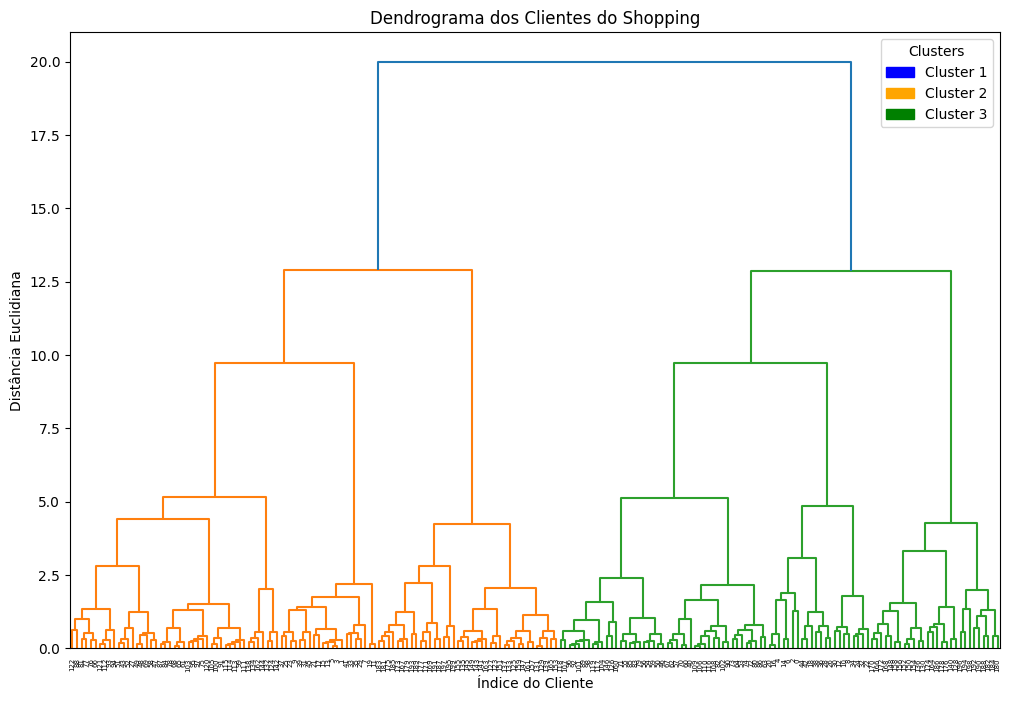

In [13]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as mpatches

# Normalizar os dados 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Realizar o linkage hierárquico
linked = linkage(scaled_data, method='ward')

# Criar o dendrograma
plt.figure(figsize=(12, 8))
dendro = dendrogram(linked,
           orientation='top',
           labels=df.index.astype(str),  # Usar índices do DataFrame como rótulos
           distance_sort='descending',
           show_leaf_counts=True)

# Adicionar título e rótulos aos eixos
plt.title('Dendrograma dos Clientes do Shopping')
plt.xlabel('Índice do Cliente')
plt.ylabel('Distância Euclidiana')

# Adicionar uma legenda
## legendas para cores dos clusters
color_map = {
    'blue': 'Cluster 1',
    'orange': 'Cluster 2',
    'green': 'Cluster 3'
}

## Criar uma lista de handles para a legenda
handles = [mpatches.Patch(color=color, label=label) for color, label in color_map.items()]
plt.legend(handles=handles, title="Clusters", loc='upper right')

# Mostrar o gráfico
plt.show()


### Exercício - 003
Modifique o método aglomerativa para 'ward' no método _linkage_ e repita o dendrograma.

O método de Ward já foi utilizado no exercício anterior. 

### Exercíco - 004
Utilize o método _axhline_ do módulo `pyplot` para traçar uma linha horizontal no valor de distância 350 no dendrograma acima. Se você cortasse o dendrograma nessa altura, quantos grupos seriam formados?

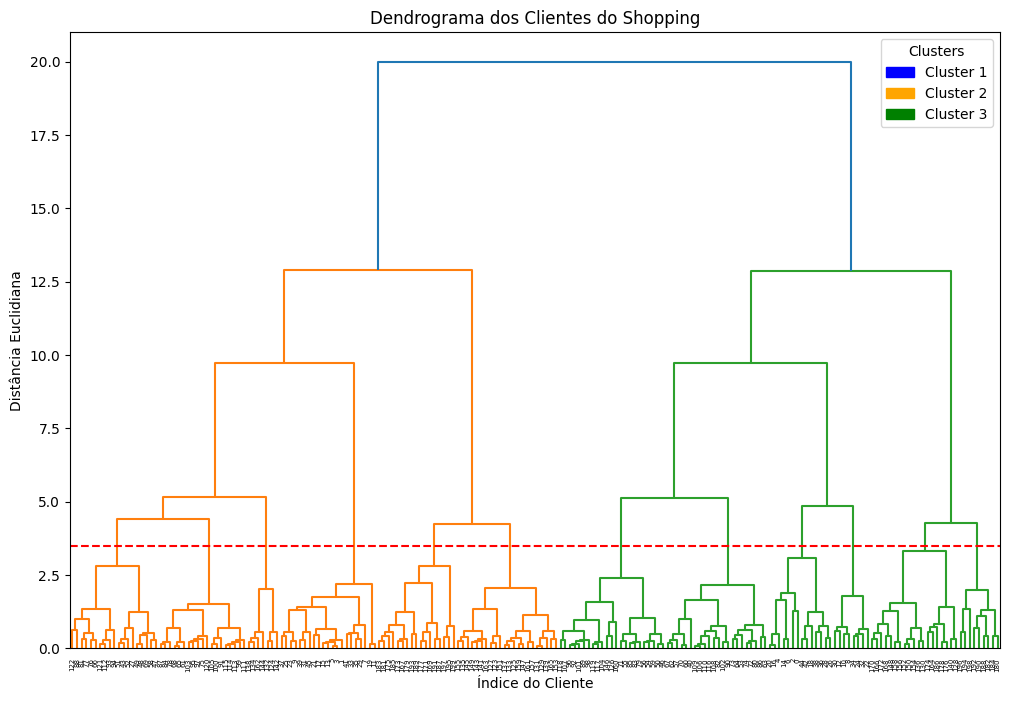

Número de grupos formados ao cortar o dendrograma em 350: 12


In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Realizar o linkage hierárquico
linked = linkage(scaled_data, method='ward')

# Criar o dendrograma
plt.figure(figsize=(12, 8))
dendro = dendrogram(linked,
           orientation='top',
           labels=df.index.astype(str),  # Usar índices do DataFrame como rótulos
           distance_sort='descending',
           show_leaf_counts=True)

# Traçar uma linha horizontal no valor de distância 350
plt.axhline(y=3.50, color='r', linestyle='--', label='Corte em 3.50')

# Adicionar título e rótulos aos eixos
plt.title('Dendrograma dos Clientes do Shopping')
plt.xlabel('Índice do Cliente')
plt.ylabel('Distância Euclidiana')

# Adicionar uma legenda
## legendas para cores dos clusters
color_map = {
    'blue': 'Cluster 1',
    'orange': 'Cluster 2',
    'green': 'Cluster 3'
}

## Criar uma lista de handles para a legenda
handles = [mpatches.Patch(color=color, label=label) for color, label in color_map.items()]
plt.legend(handles=handles, title="Clusters", loc='upper right')

# Mostrar o gráfico
plt.show()

# Determinar quantos grupos são formados ao cortar o dendrograma em 350
# Usar fcluster para obter os grupos
clusters = fcluster(linked, t=3.50, criterion='distance')

# Contar o número de grupos
num_clusters = len(set(clusters))
print(f"Número de grupos formados ao cortar o dendrograma em 350: {num_clusters}")

### Exercício - 005
Utilize o método _AgglomerativeClustering_ do módulo `sklearn.cluster` para obter os grupos formados pelo corte no dendrograma realizado acima.

In [34]:
print(scaled_data.shape)  # Deve mostrar (n_samples, n_features)
print(df.index.shape)  # Deve mostrar (n_samples,)

(9, 3)
(200,)


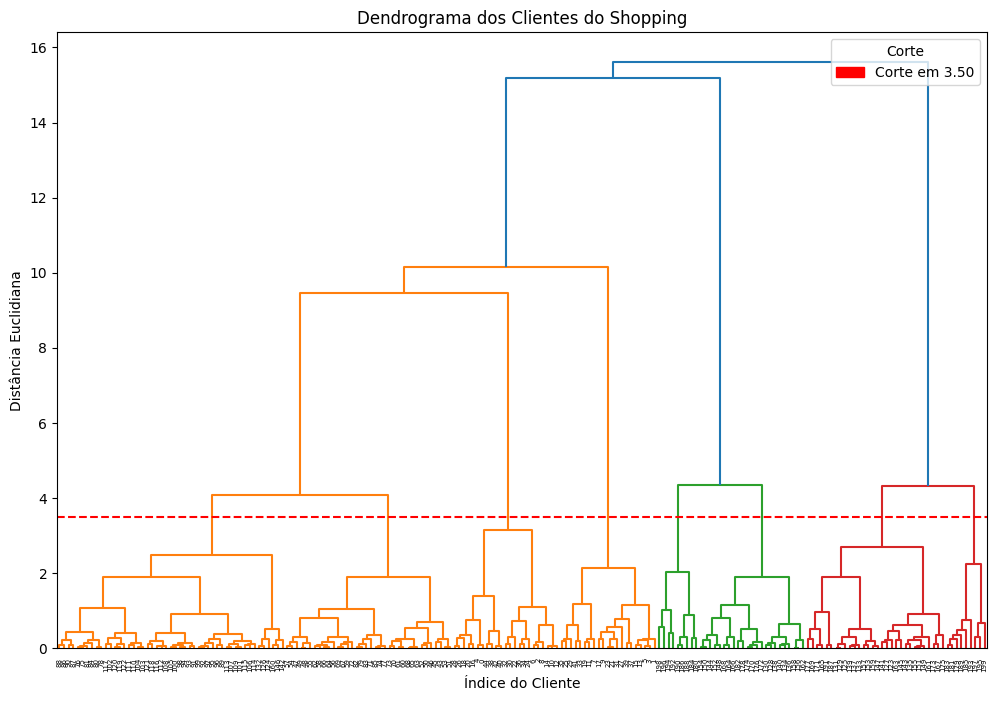

Número de grupos formados ao cortar o dendrograma em 3.50: 8


In [39]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Supondo que df contém as colunas que você deseja usar para escalonamento
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]  # Ajuste conforme necessário

# Escalonar os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Realizar o linkage hierárquico
linked = linkage(scaled_data, method='ward')

# Criar o dendrograma
plt.figure(figsize=(12, 8))
dendro = dendrogram(linked,
           orientation='top',
           labels=np.arange(len(scaled_data)),  # Usar índices numéricos como rótulos
           distance_sort='descending',
           show_leaf_counts=True)

# Traçar uma linha horizontal no valor de distância 3.50
plt.axhline(y=3.50, color='r', linestyle='--', label='Corte em 3.50')

# Adicionar título e rótulos aos eixos
plt.title('Dendrograma dos Clientes do Shopping')
plt.xlabel('Índice do Cliente')
plt.ylabel('Distância Euclidiana')

# Adicionar uma legenda
import matplotlib.patches as mpatches
handles = [mpatches.Patch(color='red', label='Corte em 3.50')]
plt.legend(handles=handles, title="Corte", loc='upper right')

# Mostrar o gráfico
plt.show()

# Usar fcluster para obter os grupos
clusters = fcluster(linked, t=3.50, criterion='distance')

# Adicionar os clusters ao DataFrame original
df['Cluster'] = clusters

# Contar o número de grupos
num_clusters = len(set(clusters))
print(f"Número de grupos formados ao cortar o dendrograma em 3.50: {num_clusters}")

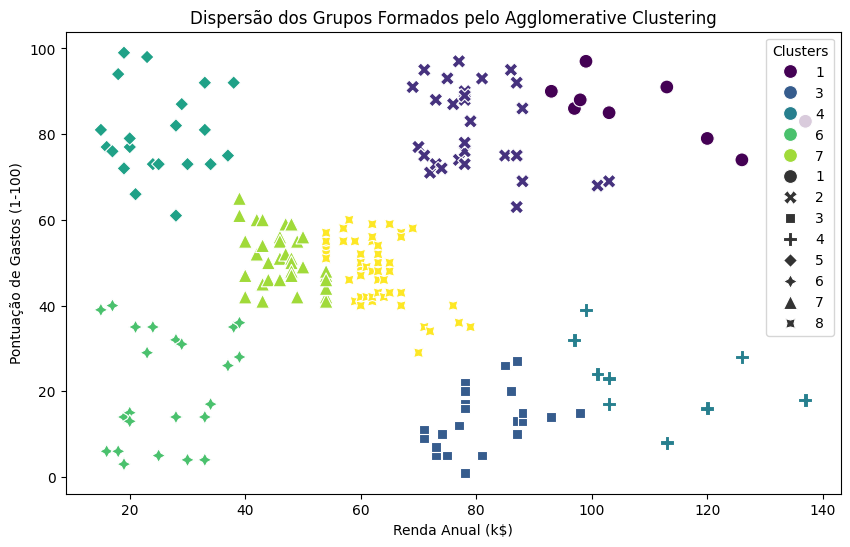

In [40]:
# Visualizar os grupos formados com um gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', style='Cluster', s=100)
plt.title('Dispersão dos Grupos Formados pelo Agglomerative Clustering')
plt.xlabel('Renda Anual (k$)')
plt.ylabel('Pontuação de Gastos (1-100)')
plt.legend(title='Clusters', loc='upper right')
plt.show()

### Exercício - 006
Faça um diagrama de disperção com as duas variáveis do conjunto de dados, e utilize os grupos atribuidos no exercício anterior para colorir os pontos em duas dimensões. Os consumidores agrupados pelo método estão separadas nas duas dimensões?

Respondido no exercício anterior. 

### Exercício - 007
Crie uma coluna com os grupos atribuidos acima. Utilize o método _groupby_ de pandas para agrupar os dados pela nova coluna criada. No objeto criado com o agrupamento utilize o método _agg_ para criar médias dos grupos. Existe uma diferença na média da idade dos grupos?

In [43]:
import pandas as pd
# Agrupar os dados pela coluna 'Cluster' e calcular as médias
grouped_means = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).reset_index()

# Exibir as médias dos grupos
print(grouped_means)

# Verificar a média da idade de cada grupo
age_means = grouped_means[['Cluster', 'Age']]
print(age_means)

   Cluster        Age  Annual Income (k$)  Spending Score (1-100)
0        1  33.000000          109.555556               85.888889
1        2  32.600000           79.633333               81.000000
2        3  41.217391           80.956522               12.782609
3        4  40.444444          111.000000               22.777778
4        5  25.333333           25.095238               80.047619
5        6  45.217391           26.304348               20.913043
6        7  46.111111           46.388889               50.638889
7        8  39.816327           62.734694               48.020408
   Cluster        Age
0        1  33.000000
1        2  32.600000
2        3  41.217391
3        4  40.444444
4        5  25.333333
5        6  45.217391
6        7  46.111111
7        8  39.816327


### Exercício - 008
Utilize a planilha original, com a coluna _Gender_ para fazer uma tabela de contingência (use o método _crosstab_) com os grupos determinados com o agrupamento hierárquico. Parece assitir associação entre o gênero e os grupos encontrados?

In [44]:
# Carregar novamente os dados completos já baixados
df2 = pd.read_csv(f'{data_dir}/Mall_Customers.csv')
print(df2.head)

<bound method NDFrame.head of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>


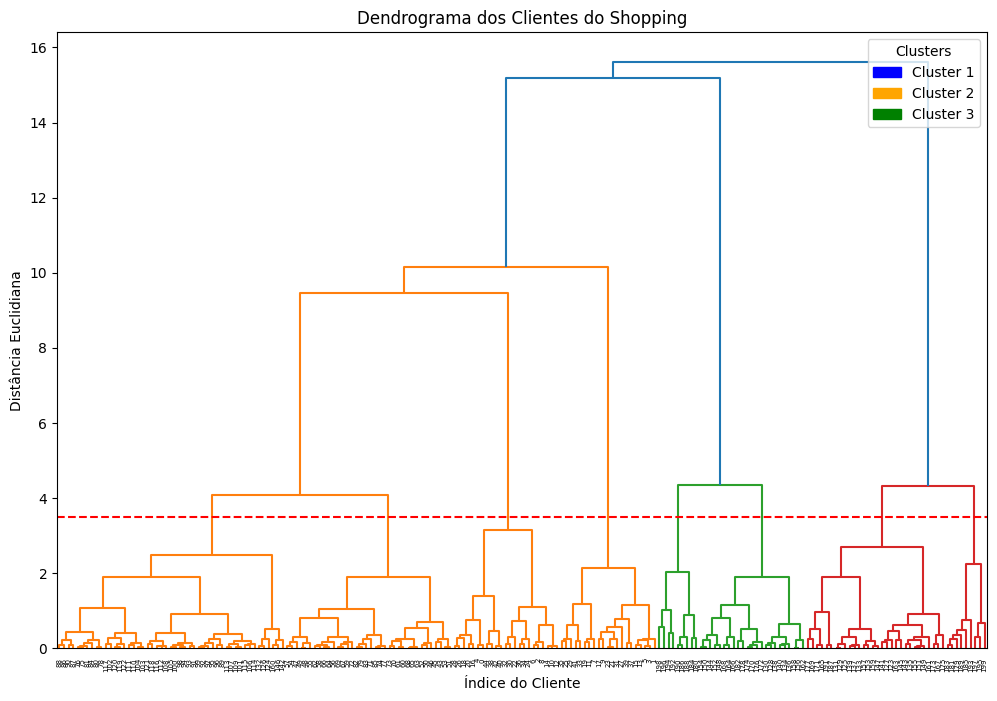

Número de grupos formados ao cortar o dendrograma em 350: 8
Médias dos Grupos:
   Cluster        Age  Annual Income (k$)  Spending Score (1-100)
0        1  33.000000          109.555556               85.888889
1        2  32.600000           79.633333               81.000000
2        3  41.217391           80.956522               12.782609
3        4  40.444444          111.000000               22.777778
4        5  25.333333           25.095238               80.047619
5        6  45.217391           26.304348               20.913043
6        7  46.111111           46.388889               50.638889
7        8  39.816327           62.734694               48.020408

Média da Idade por Grupo:
   Cluster        Age
0        1  33.000000
1        2  32.600000
2        3  41.217391
3        4  40.444444
4        5  25.333333
5        6  45.217391
6        7  46.111111
7        8  39.816327


In [46]:
# Realizar o linkage hierárquico
linked = linkage(scaled_data, method='ward')

# Criar o dendrograma
plt.figure(figsize=(12, 8))
dendro = dendrogram(linked,
           orientation='top',
           labels=df2.index.astype(str),  # Usar índices do DataFrame como rótulos
           distance_sort='descending',
           show_leaf_counts=True)

# Traçar uma linha horizontal no valor de distância 350
plt.axhline(y=3.50, color='r', linestyle='--', label='Corte em 3.50')

# Adicionar título e rótulos aos eixos
plt.title('Dendrograma dos Clientes do Shopping')
plt.xlabel('Índice do Cliente')
plt.ylabel('Distância Euclidiana')

# Adicionar uma legenda
## legendas para cores dos clusters
color_map = {
    'blue': 'Cluster 1',
    'orange': 'Cluster 2',
    'green': 'Cluster 3'
}

## Criar uma lista de handles para a legenda
handles = [mpatches.Patch(color=color, label=label) for color, label in color_map.items()]
plt.legend(handles=handles, title="Clusters", loc='upper right')

# Mostrar o gráfico
plt.show()

# Usar fcluster para obter os grupos
clusters = fcluster(linked, t=3.50, criterion='distance')

# Contar o número de grupos
num_clusters = len(set(clusters))
print(f"Número de grupos formados ao cortar o dendrograma em 350: {num_clusters}")

# Adicionando a nova coluna ao DataFrame
df2['Cluster'] = clusters

# Agrupar os dados pela coluna 'Cluster' e calcular as médias
grouped_means = df2.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).reset_index()

# Exibir as médias dos grupos
print("Médias dos Grupos:")
print(grouped_means)

# Verificar a média da idade de cada grupo
age_means = grouped_means[['Cluster', 'Age']]
print("\nMédia da Idade por Grupo:")
print(age_means)

Gender   Female  Male
Cluster              
1             5     4
2            16    14
3             7    16
4             7     2
5            12     9
6            14     9
7            21    15
8            30    19


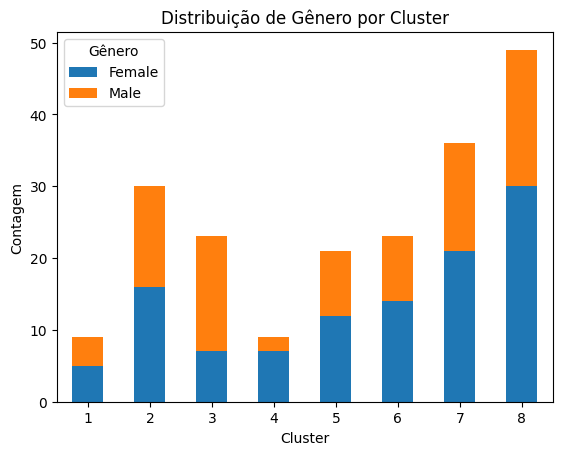

In [51]:
# Investigar se há associação entre gênero e os clusters
## 1. Verificar a Distribuição de Gênero por Grupo
# Supondo que você tenha uma coluna 'Gender' em df2
gender_distribution = df2.groupby(['Cluster', 'Gender']).size().unstack(fill_value=0)
print(gender_distribution)

## Visualização
import matplotlib.pyplot as plt

# Gráfico de barras
gender_distribution.plot(kind='bar', stacked=True)
plt.title('Distribuição de Gênero por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Contagem')
plt.legend(title='Gênero')
plt.xticks(rotation=0)
plt.show()

In [49]:
## 2. Teste Qui-Quadrado
from scipy.stats import chi2_contingency

# Preparar a tabela de contingência
contingency_table = gender_distribution.values

# Realizar o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}, p-value: {p}")

Chi-squared: 8.775240521580363, p-value: 0.26919824077835874


Não há uma associação aparente entre gênero e os grupos encontrados. 

### Exercíco - 009
Utilize o método _clustermap_ para criar um mapa de calor do conjunto de dados com uma barra de cor correspondente aos grupos utilizando o parâmetro _row_colors_.